# UMAP clustering for the methylation signature Position Weight Matrices
## Wastewater data

In [1]:
import pandas as pd
import numpy as np
import warnings

from matplotlib.colors import ListedColormap

import os 
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import umap
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import seaborn as sns
import os
from PIL import Image, ImageFont
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
import matplotlib.lines as mlines


seed = 98
import matplotlib.pyplot as plt
import seaborn as sns

# Tästä asti uutta

In [2]:
path_to_images = '/scratch/project_2006608/Methylation/notebooks/UMAP_WW/'

## FILTERING
### > 20 lines in .gff

In [3]:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF1_matrices_top20/flattened/EFF1_concat_matrices_top20.tsv'
EFF1_matrices = pd.read_csv(file_path, sep='\t', index_col=0, low_memory=False)

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/project_2006608/Methylation/WW_data/EFF1_matrices_top20/flattened/EFF1_concat_matrices_top20.tsv'

In [ ]:
print(EFF1_matrices.shape)
EFF1_matrices.head()

In [ ]:
df_EFF1 = EFF1_matrices.loc[(EFF1_matrices.iloc[:, :492] != 0).any(axis=1)]

df_EFF1.shape
df_EFF1.head()

In [ ]:
df_EFF1['sample'].value_counts()

In [ ]:
# All
#n_neighbors = [20, 30 ]
#min_dist = [0.01, 0.1, 0.2]
# The best
n_neighbors = [20 ]
min_dist = [0.01]

colors = sns.color_palette("hls", 32).as_hex()

color_dict = ['#14c5cb']

for n in n_neighbors:
    for m in min_dist:
        
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(df.iloc[:, :-17])
        UMAP_df_EFF1  = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig': df_EFF1.index
        })
        # clustering
        kmeans = KMeans(n_clusters=11, random_state=seed)
        
        k_labels = kmeans.fit_predict(embedding)
        
        UMAP_df_EFF1['cluster'] = k_labels
        
        fig = px.scatter(UMAP_df_EFF1, 
                            x='UMAP1', 
                            y='UMAP2', 
                            title=f' Wastewater - UMAP with n_neighbors={n}, min_dist={m}', 
                            color_discrete_sequence=color_dict,
                            hover_data={'cluster': True, 'contig': True})
        title = f' Wastewater - UMAP with n_neighbors={n}, min_dist={m}'
        fig.update_layout(
            height=1500,
            width=1200,
            title_text=title,
            showlegend=True,
            legend=dict(
                x=0.5,
                y=-0.1,
                traceorder="normal",
                xanchor='center',
                yanchor='top',
                orientation='h'
            ),
            template='simple_white',
            xaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,  
                linecolor='black', 
                linewidth=1,
                mirror=True
            ),
            yaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,
                linecolor='black',
                linewidth=1,
                mirror=True
            )
        )
        fig.show()
        fig.write_image(f'UMAP_WW/UMAP_{n}_{m}_above20_EFF1.png')
        fig.write_html(f'UMAP_WW/UMAP_{n}_{m}_above20_EFF1.html')

## FILTERING
### > 100 lines in .gff

In [4]:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF1_matrices_top100/flattened/EFF1_concat_matrices_top100.tsv'
EFF1_matrices = pd.read_csv(file_path, sep='\t', index_col=0, low_memory=False)

In [5]:
print(EFF1_matrices.shape[0])

60373


In [6]:
print(EFF1_matrices.shape)
EFF1_matrices.head()

(60373, 493)


-20_A_m4C  -19_A_m4C  -18_A_m4C  -17_A_m4C  -16_A_m4C  \
0                                                                          
s32042.ctg038187l   0.000000   0.000000    0.00000   0.000000   0.000000   
s1667.ctg051744l    0.000000   0.000000    0.00000   0.000000   0.000000   
s31045.ctg036909l   0.000000   0.000000    0.00000   0.000000   0.000000   
s20578.ctg024035l   0.207234  -0.074724   -0.28437   0.062514  -0.162525   
s34453.ctg041293l   0.000000   0.000000    0.00000   0.000000   0.000000   

                   -15_A_m4C  -14_A_m4C  -13_A_m4C  -12_A_m4C  -11_A_m4C  ...  \
0                                                                         ...   
s32042.ctg038187l   0.000000   0.000000   0.000000    0.00000   0.000000  ...   
s1667.ctg051744l    0.000000   0.000000   0.000000    0.00000   0.000000  ...   
s31045.ctg036909l   0.000000   0.000000   0.000000    0.00000   0.000000  ...   
s20578.ctg024035l  -0.197546   0.131547  -0.273181   -0.16421   0.096813  ...   
s34453.ctg041293l   0.000000   0.000000   0.000000    0.00000   0.000000  ...   

                   12_G_m6A  13_G_m6A  14_G_m6A  15_G_m6A  16_G_m6A  17_G_m6A  \
0                                                                               
s32042.ctg038187l  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
s1667.ctg051744l   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
s31045.ctg036909l  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
s20578.ctg024035l -0.235718  0.164169  0.213633 -0.094845  0.085058  0.075869   
s34453.ctg041293l  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                   18_G_m6A  19_G_m6A  20_G_m6A  sample  
0                                                        
s32042.ctg038187l  0.000000  0.000000  0.000000    EFF1  
s1667.ctg051744l   0.000000  0.000000  0.000000    EFF1  
s31045.ctg036909l  0.000000  0.000000  0.000000    EFF1  
s20578.ctg024035l -0.062523  0.147121  0.155681    EFF1  
s34453.ctg041293l  0.000000  0.000000  0.000000    EFF1  

[5 rows x 493 columns]

In [7]:
df_EFF1 = EFF1_matrices.loc[(EFF1_matrices.iloc[:, :492] != 0).any(axis=1)]
df_EFF1.shape
df_EFF1.head()

-20_A_m4C  -19_A_m4C  -18_A_m4C  -17_A_m4C  -16_A_m4C  \
0                                                                          
s20578.ctg024035l   0.207234  -0.074724  -0.284370   0.062514  -0.162525   
s10547.ctg012093l   0.000000   0.000000   0.000000   0.000000   0.000000   
s15252.ctg017667l   0.000000   0.000000   0.000000   0.000000   0.000000   
s29924.ctg035497l   0.000000   0.000000   0.000000   0.000000   0.000000   
s4110.ctg004596l   -0.211630  -0.257595  -0.409714  -0.409714  -0.356395   

                   -15_A_m4C  -14_A_m4C  -13_A_m4C  -12_A_m4C  -11_A_m4C  ...  \
0                                                                         ...   
s20578.ctg024035l  -0.197546   0.131547  -0.273181  -0.164210   0.096813  ...   
s10547.ctg012093l   0.000000   0.000000   0.000000   0.000000   0.000000  ...   
s15252.ctg017667l   0.000000   0.000000   0.000000   0.000000   0.000000  ...   
s29924.ctg035497l   0.000000   0.000000   0.000000   0.000000   0.000000  ...   
s4110.ctg004596l   -0.656976  -0.167686  -0.167686  -0.808099  -0.257595  ...   

                   12_G_m6A  13_G_m6A  14_G_m6A  15_G_m6A  16_G_m6A  17_G_m6A  \
0                                                                               
s20578.ctg024035l -0.235718  0.164169  0.213633 -0.094845  0.085058  0.075869   
s10547.ctg012093l  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
s15252.ctg017667l  0.305418 -0.561766  0.248609  0.218947 -0.056614  0.248609   
s29924.ctg035497l  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
s4110.ctg004596l   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

                   18_G_m6A  19_G_m6A  20_G_m6A  sample  
0                                                        
s20578.ctg024035l -0.062523  0.147121  0.155681    EFF1  
s10547.ctg012093l  0.000000  0.000000  0.000000    EFF1  
s15252.ctg017667l -0.139254 -0.229343  0.385004    EFF1  
s29924.ctg035497l  0.000000  0.000000  0.000000    EFF1  
s4110.ctg004596l   0.000000  0.000000  0.000000    EFF1  

[5 rows x 493 columns]

In [8]:
df_EFF1['sample'].value_counts()

sample
EFF1    24443
Name: count, dtype: int64

/PUHTI_TYKKY_FRQGCcR/miniconda/envs/env1/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


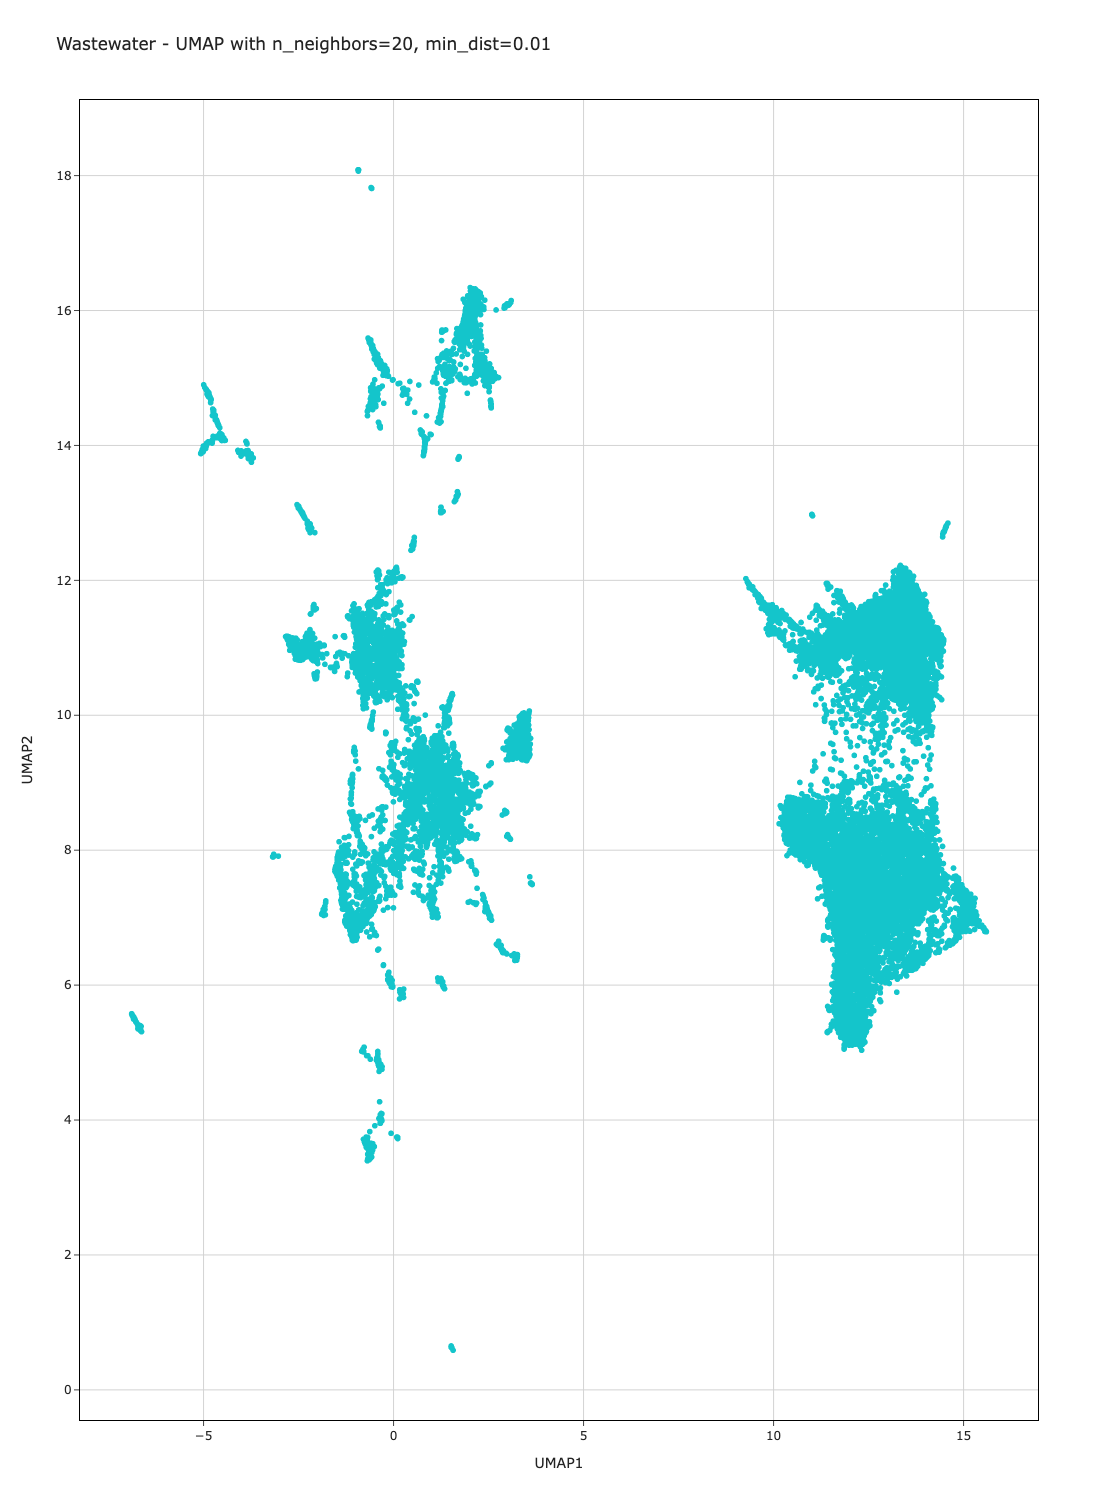

In [9]:
# All
#n_neighbors = [20, 30 ]
#min_dist = [0.01, 0.1, 0.2]
# The best
n_neighbors = [20 ]
min_dist = [0.01]

colors = sns.color_palette("hls", 32).as_hex()

color_dict = ['#14c5cb']

for n in n_neighbors:
    for m in min_dist:
        
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(df_EFF1.iloc[:, :-17])
        UMAP_df_EFF1  = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig': df_EFF1.index
        })
        # clustering
        kmeans = KMeans(n_clusters=11, random_state=seed)
        
        k_labels = kmeans.fit_predict(embedding)
        
        UMAP_df_EFF1['cluster'] = k_labels
        
        fig = px.scatter(UMAP_df_EFF1, 
                            x='UMAP1', 
                            y='UMAP2', 
                            title=f' Wastewater - UMAP with n_neighbors={n}, min_dist={m}', 
                            color_discrete_sequence=color_dict,
                            hover_data={'cluster': True, 'contig': True})
        title = f' Wastewater - UMAP with n_neighbors={n}, min_dist={m}'
        fig.update_layout(
            height=1500,
            width=1200,
            title_text=title,
            showlegend=True,
            legend=dict(
                x=0.5,
                y=-0.1,
                traceorder="normal",
                xanchor='center',
                yanchor='top',
                orientation='h'
            ),
            template='simple_white',
            xaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,  
                linecolor='black', 
                linewidth=1,
                mirror=True
            ),
            yaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,
                linecolor='black',
                linewidth=1,
                mirror=True
            )
        )
        fig.show()
        fig.write_image(f'UMAP_WW/UMAP_{n}_{m}_above100_EFF1.png')
        fig.write_html(f'UMAP_WW/UMAP_{n}_{m}_above100_EFF1.html')

### Extract clusters
#### C1

In [11]:
# Extract based on UMAP1 (x axis) & UMAP2 (y axis) values:
UMAP_df_EFF1_C1 = UMAP_df_EFF1.loc[(UMAP_df_EFF1['UMAP1']>= -5) & (UMAP_df_EFF1['UMAP1']<= 0)
    & (UMAP_df_EFF1['UMAP2']>= 18) & (UMAP_df_EFF1['UMAP2']<= 19)]

# Check
UMAP_df_EFF1_C1.head()

df_EFF1_C1 = df_EFF1[df_EFF1.index.isin(UMAP_df_EFF1_C1['contig'])]
print(df_EFF1_C1)

                   -20_A_m4C  -19_A_m4C  -18_A_m4C  -17_A_m4C  -16_A_m4C  \
0                                                                          
s36305.ctg043766l  -0.217711   0.075185  -0.249136  -0.249136  -0.021686   
s39221.ctg047945l   0.081704   0.038707  -0.037339  -0.069453  -0.172492   
s38686.ctg047131l   0.042908   0.206426   0.042908   0.111555   0.024983   
s1038.ctg022244l   -0.182208  -0.014096  -0.014096  -0.258256  -0.077991   
s34819.ctg041773l  -0.094542   0.010466   0.010466   0.010466  -0.094542   
s25821.ctg030420l   0.145176  -0.052996   0.102805   0.262476   0.172457   
s39729.ctg048741l  -0.076937  -0.398875   0.099266  -0.193586   0.075916   
s29375.ctg034821l   0.175003  -0.027417   0.013790  -0.041539   0.000242   
s2892.ctg003216l    0.116204   0.007775  -0.075790   0.095438   0.146566   
s12405.ctg014265l   0.111206  -0.081107  -0.064927  -0.259176  -0.049005   
s28226.ctg033385l  -0.152889  -0.073501  -0.073501   0.000046  -0.073501   
s2676.ctg002

In [12]:
# Save contig IDs
EFF1_C1_contigs = df_EFF1_C1.index.to_list()

directory = 'UMAP_WW'
file_path = os.path.join(directory, 'EFF1_C1_contigs_above100.txt')

with open(file_path, 'w') as file:
    for item in EFF1_C1_contigs:
        file.write(f"{item}\n")

/PUHTI_TYKKY_FRQGCcR/miniconda/envs/env1/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



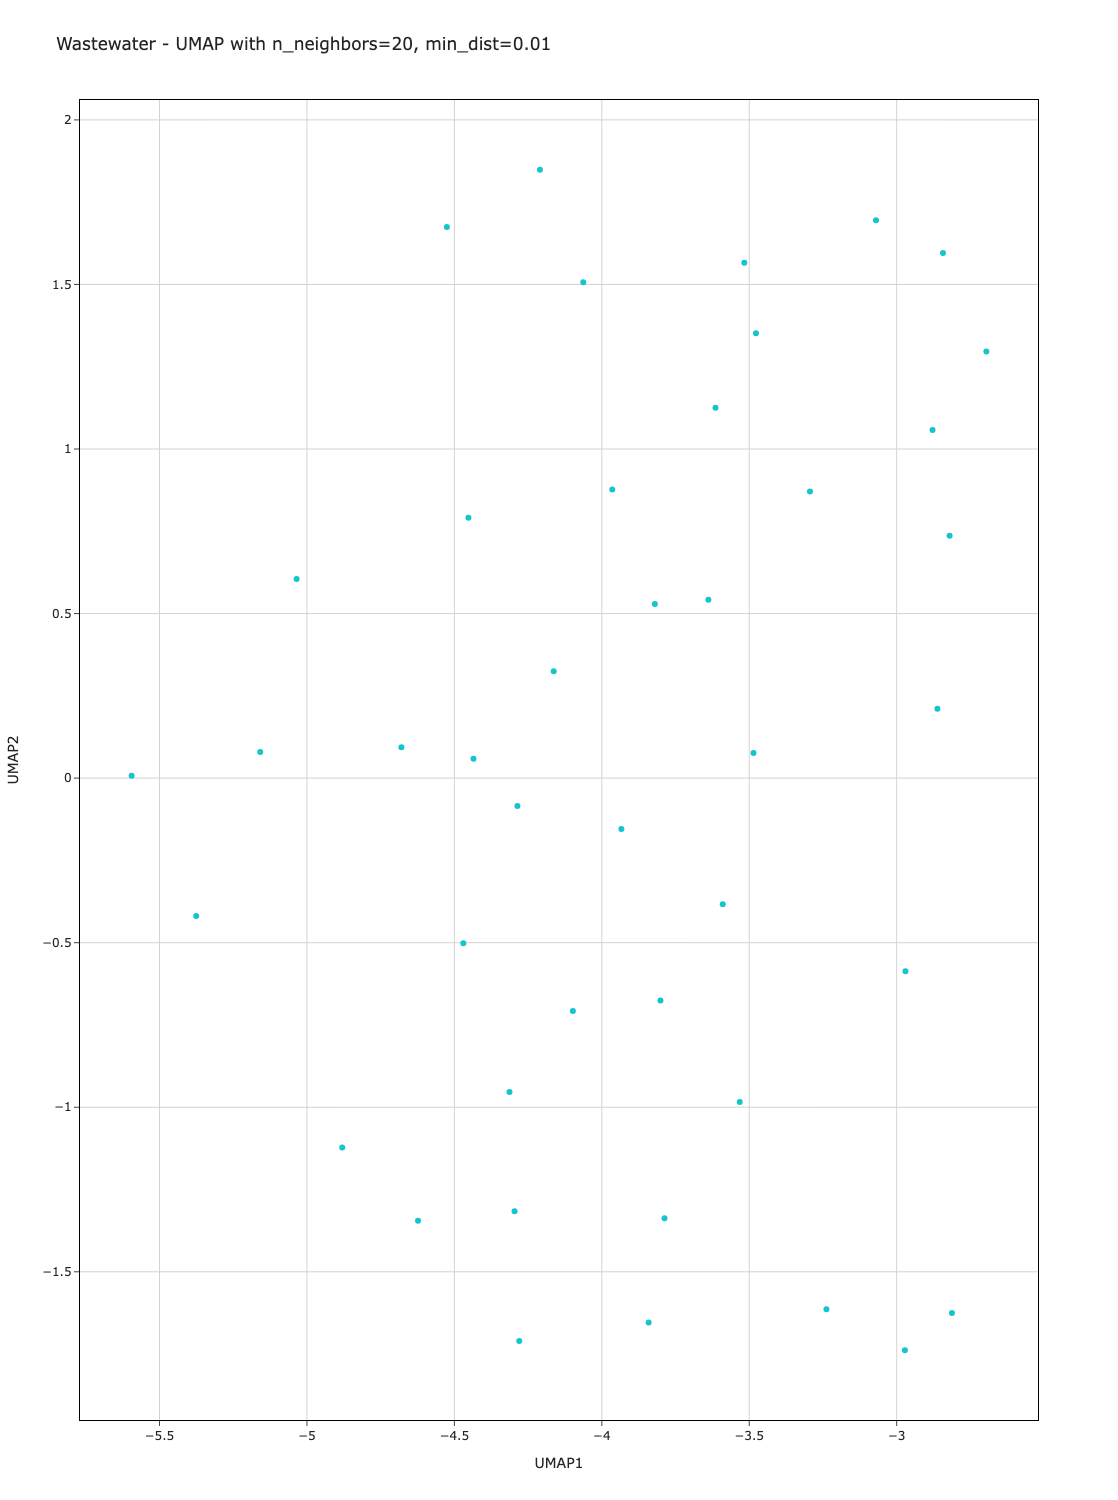

In [13]:
# All
#n_neighbors = [20, 30 ]
#min_dist = [0.01, 0.1, 0.2]
# The best
n_neighbors = [20 ]
min_dist = [0.01]

colors = sns.color_palette("hls", 32).as_hex()

color_dict = ['#14c5cb']

for n in n_neighbors:
    for m in min_dist:
        
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(df_EFF1_C1.iloc[:, :-17])
        UMAP_df_EFF1_C1  = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig': df_EFF1_C1.index
        })
        # clustering
        kmeans = KMeans(n_clusters=11, random_state=seed)
        
        k_labels = kmeans.fit_predict(embedding)
        
        UMAP_df_EFF1_C1['cluster'] = k_labels
        
        fig = px.scatter(UMAP_df_EFF1_C1, 
                            x='UMAP1', 
                            y='UMAP2', 
                            title=f' Wastewater - UMAP with n_neighbors={n}, min_dist={m}', 
                            color_discrete_sequence=color_dict,
                            hover_data={'cluster': True, 'contig': True})
        title = f' Wastewater - UMAP with n_neighbors={n}, min_dist={m}'
        fig.update_layout(
            height=1500,
            width=1200,
            title_text=title,
            showlegend=True,
            legend=dict(
                x=0.5,
                y=-0.1,
                traceorder="normal",
                xanchor='center',
                yanchor='top',
                orientation='h'
            ),
            template='simple_white',
            xaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,  
                linecolor='black', 
                linewidth=1,
                mirror=True
            ),
            yaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,
                linecolor='black',
                linewidth=1,
                mirror=True
            )
        )
        fig.show()
        #fig.write_image(f'UMAP_WW/UMAP_{n}_{m}_above100_C1_EFF1.png')
        #fig.write_html(f'UMAP_WW/UMAP_{n}_{m}_above100_C1_EFF1.html')

## FILTERING
### > 200 lines in .gff

In [ ]:
file_path = '/scratch/project_2006608/Methylation/WW_data/EFF1_matrices_top200/flattened/EFF1_concat_matrices_top200.tsv'
EFF1_matrices = pd.read_csv(file_path, sep='\t', index_col=0, low_memory=False)

In [ ]:
print(df.shape[0])

In [ ]:
print(EFF1_matrices.shape)
EFF1_matrices.head()

In [ ]:
df_EFF1 = EFF1_matrices.loc[(EFF1_matrices.iloc[:, :492] != 0).any(axis=1)]
df_EFF1.shape
df_EFF1.head()

In [ ]:
df_EFF1['sample'].value_counts()

In [ ]:
# All
#n_neighbors = [20, 30 ]
#min_dist = [0.01, 0.1, 0.2]
# The best
n_neighbors = [20 ]
min_dist = [0.01]

colors = sns.color_palette("hls", 32).as_hex()

color_dict = ['#14c5cb']

for n in n_neighbors:
    for m in min_dist:
        
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, random_state=seed)
        embedding = reducer.fit_transform(df.iloc[:, :-17])
        UMAP_df_EFF1  = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig': df_EFF1.index
        })
        # clustering
        kmeans = KMeans(n_clusters=11, random_state=seed)
        
        k_labels = kmeans.fit_predict(embedding)
        
        UMAP_df['cluster'] = k_labels
        
        fig = px.scatter(UMAP_df_EFF1, 
                            x='UMAP1', 
                            y='UMAP2', 
                            title=f' Wastewater - UMAP with n_neighbors={n}, min_dist={m}', 
                            color_discrete_sequence=color_dict,
                            hover_data={'cluster': True, 'contig': True})
        title = f' Wastewater - UMAP with n_neighbors={n}, min_dist={m}'
        fig.update_layout(
            height=1500,
            width=1200,
            title_text=title,
            showlegend=True,
            legend=dict(
                x=0.5,
                y=-0.1,
                traceorder="normal",
                xanchor='center',
                yanchor='top',
                orientation='h'
            ),
            template='simple_white',
            xaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,  
                linecolor='black', 
                linewidth=1,
                mirror=True
            ),
            yaxis=dict(
                showgrid=True,
                gridcolor='lightgray',
                zeroline=False,
                showline=True,
                linecolor='black',
                linewidth=1,
                mirror=True
            )
        )
        fig.show()
        fig.write_image(f'UMAP_WW_top150_features/UMAP_{n}_{m}_above200_EFF1.png')
        fig.write_html(f'UMAP_WW_top150_features/UMAP_{n}_{m}_above200_EFF1.html')

## FILTERING
### Those that were top150 features with HAMBI data 🔝

# Tähän asti uutta

In [ ]:
def prepare_taxa_data(taxa_path: str):
    """Read and process the taxa data to include concatenated taxonomy strings."""
    taxa_names = pd.read_csv(taxa_path, sep='\t', index_col=0, header=0)
    taxa_names.loc[:, 'All'] = taxa_names.apply(lambda row: '_'.join(row.dropna().astype(str)), axis=1)

    def concatenate_non_na(row):
        filtered = row.dropna()
        if len(filtered) != len(row):
            return np.nan 
        return '_'.join(filtered.astype(str))
    taxa_names['Domain to phylum'] = taxa_names.loc[:, ['d', 'p']].apply(concatenate_non_na, axis=1)
    taxa_names['Domain to class'] = taxa_names.loc[:, ['d', 'p', 'c']].apply(concatenate_non_na, axis=1)
    taxa_names['Domain to order'] = taxa_names.loc[:, ['d', 'p', 'c', 'o']].apply(concatenate_non_na, axis=1)
    taxa_names['Domain to family'] = taxa_names.loc[:, ['d', 'p', 'c', 'o', 'f']].apply(concatenate_non_na, axis=1)
    taxa_names['Domain to genus'] = taxa_names.loc[:, ['d', 'p', 'c', 'o', 'f', 'g']].apply(concatenate_non_na, axis=1)
    taxa_names['Domain to species'] = taxa_names.loc[:, ['d', 'p', 'c', 'o', 'f', 'g', 's']].apply(concatenate_non_na, axis=1)    

    return taxa_names
    
def load_and_combine_modifications(matrice_path: str):
    """Load all modification type files and combined to one data frame"""
    data_frames = []
    for file in os.listdir(matrice_path):
        if file.endswith('.tsv') and file != 'taxa_names.tsv':
            file_path = os.path.join(matrice_path, file)
            modification_type = file.split('.')[0]
            data_frame = pd.read_csv(file_path, sep='\t', index_col=0, header=None)
            data_frame = rename_columns(data_frame, modification_type)
            data_frames.append(data_frame)
    
    combined_mods_df = pd.concat(data_frames, axis = 1)
    return combined_mods_df

def rename_columns(data_frame: pd.DataFrame, modification_type: str) -> pd.DataFrame:
    """ Renames the columns of the data frame based on the modification type,
        nucleotide and location in the context sequences.

        Parameters:
        - data_frame (pd.DataFrame): Data frame with the data.
        - modification_type (str): Type of modification.

        Returns:
        - data_frame (pd.DataFrame): Data frame with the renamed columns.
        """
    
    columns = []
    for n in ['A', 'T', 'C', 'G']:
        for i in range(-20, 21):
            columns.append(f'{i}_{n}_{modification_type}')
    data_frame.columns = columns
    return data_frame

def process_sample(sample_path: str, sample_name: str):
    """
    Processes a single sample folder, loading modifications and taxa data and combining them.
    Adds a sample name column for tracking the source of the data, and resets the index to retain contig IDs.
    """
    path_to_files = os.path.join(sample_path, 'matrices', 'flattened')

    combined_mods_df = load_and_combine_modifications(path_to_files)

    taxa_file_path = os.path.join(path_to_files, 'taxa_names.tsv')
    taxa_df = prepare_taxa_data(taxa_file_path)

    combined_df = pd.concat([combined_mods_df, taxa_df], axis=1)

    combined_df['contig id'] = combined_df.index
    
    combined_df['sample'] = sample_name
    
    return combined_df


# Combine modification types, taxa and sample to one data frame

In [ ]:
folder_path = '/scratch/project_2009999/heidi/results_final/waste_water'
folders = [x for x in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, x))]

samples = ['INF1', 'INF2', 'INF3', 'EFF1', 'EFF2', 'EFF3', 'SLU1', 'SLU2', 'SLU3']

all_samples_data = []
output_file = os.path.join(folder_path, 'combined_all_samples_with_samples.tsv')
if not os.path.exists(output_file):
    for folder in folders:
        for sample in samples:
            if sample in folder:
                sample_path = os.path.join(folder_path, folder)
                
                print(f"Processing {folder}...")
    
                combined_sample_df = process_sample(sample_path, sample)
    
                all_samples_data.append(combined_sample_df)
    
                print(f"Data combined for {folder}.")
    
    print("concatenating")
    combined_all_samples_df = pd.concat(all_samples_data, axis=0)
    
    combined_all_samples_df = combined_all_samples_df.reset_index(drop=True)
    print("Writing file...")
    combined_all_samples_df.to_csv(output_file, sep='\t')
    print("Done")
else:
    print(f"File '{output_file}' already exists.")

print("All samples combined and saved with unique index and contig_id column.")


# UMAP

In [ ]:
combined_all_samples_df_with_zeros = pd.read_csv('/scratch/project_2009999/heidi/results_final/waste_water/combined_all_samples_with_samples.tsv', sep='\t', index_col= 0)

In [ ]:
combined_all_samples_df_with_zeros.shape

In [ ]:
combined_all_samples_df_with_zeros.iloc[:, :492].head()

In [ ]:
combined_all_samples_df_with_zeros[combined_all_samples_df_with_zeros['contig id'] == '']

# Filtering
remove rows where no methylation detected or less than 20 detected in any of the methyaltion types (since they are 0 filled matrices)

In [ ]:
# remove rows where no methylation detected or less than 20 detected in any of the methyaltion types (since they are 0 filled matrices)
combined_all_samples_df = combined_all_samples_df_with_zeros.loc[(combined_all_samples_df_with_zeros.iloc[:, :492] != 0).any(axis=1)]

combined_all_samples_df.shape

# How many contigs from each sample 

In [ ]:
combined_all_samples_df['sample'].value_counts()

# Data frame for each sample from different environment 

In [ ]:
SLU = combined_all_samples_df[combined_all_samples_df['sample'].str.startswith('SLU')]
EFF = combined_all_samples_df[combined_all_samples_df['sample'].str.startswith('EFF')]
INF = combined_all_samples_df[combined_all_samples_df['sample'].str.startswith('INF')]


In [ ]:
SLU['sample'].value_counts()

# To test out the UMAP let's take a smaller sample 

In [ ]:
sample_proportions = combined_all_samples_df['sample'].value_counts(normalize=True)

# Multiply the proportions by the total number of samples you want (1000 in this case)
n_samples_per_group = (sample_proportions * 1000).round().astype(int)

# Now, sample from each group according to the calculated sample sizes
sampled_df = combined_all_samples_df.groupby('sample').apply(lambda x: x.sample(n=n_samples_per_group[x.name], random_state=42))

# Remove the multi-index created by groupby
sampled_df = sampled_df.reset_index(drop=True)

In [ ]:
sampled_df

In [ ]:
sampled_df
n_neighbors = [15, 20, 50, 60, 100, 200, 300, 400]
min_dist = [0.001, 0.01, 0.1]

for n in n_neighbors:
    for m in min_dist:
        
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, spread = 1, random_state=seed)
        embedding = reducer.fit_transform(sampled_df.iloc[:, :492])
        
        UMAP_df = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig id': sampled_df['contig id'], 
            'sample': sampled_df['sample']
        })

        plt.figure(figsize=(8, 6))
        plt.scatter(UMAP_df['UMAP1'], UMAP_df['UMAP2'], s=10, alpha=0.7)
        plt.title(f'UMAP with n_neighbors={n}, min_dist={m}', fontsize=14)
        plt.xlabel('UMAP1', fontsize=12)
        plt.ylabel('UMAP2', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)

        plt.tight_layout()
        plt.show()

In [ ]:
print("Hello")

# UMAP with samples combined 

In [ ]:
n_neighbors = [15, 20, 50, 60, 100, 200, 300, 400]
min_dist = [0.001, 0.01, 0.1]

for n in n_neighbors:
    for m in min_dist:
        
        reducer = umap.UMAP(n_neighbors=n, min_dist=m, spread = 1, random_state=seed)
        embedding = reducer.fit_transform(combined_all_samples_df.iloc[:, :492])
        
        UMAP_df = pd.DataFrame({
            'UMAP1': embedding[:, 0],
            'UMAP2': embedding[:, 1],
            'contig id': combined_all_samples_df['contig id'], 
            'sample': combined_all_samples_df['sample']
        })

        plt.figure(figsize=(8, 6))
        plt.scatter(UMAP_df['UMAP1'], UMAP_df['UMAP2'], s=10, alpha=0.7)
        plt.title(f'UMAP with n_neighbors={n}, min_dist={m}', fontsize=14)
        plt.xlabel('UMAP1', fontsize=12)
        plt.ylabel('UMAP2', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.5)

        plt.tight_layout()
        plt.show()

# Investigating the parameters for each sample individually
Combining them did not show promising results

In [ ]:
def perform_umap_reduction(data, n_neighbors, min_dist):
    """Performs UMAP dimensionality reduction."""
    reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
    embedding = reducer.fit_transform(data)
    return embedding

def apply_kmeans_clustering(embedding, n_clusters):
    """Applies KMeans clustering on the UMAP embedding."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(embedding)
    return clusters

def plot_umap(ax, UMAP_df, sample, n_neighbors, min_dist, cmap, k, row, sample_colors):
    """Plots UMAP embedding or clustering results on the provided axes."""
    if row == 0:
        color = sample_colors[sample]
        ax.scatter(UMAP_df['UMAP1'], UMAP_df['UMAP2'], color=color, s=10, alpha=0.7)
    else:
        ax.scatter(UMAP_df['UMAP1'], UMAP_df['UMAP2'], c=UMAP_df['cluster'], cmap=cmap, s=10, alpha=0.7)
    
    title = (f'Sample {sample}\nn_neighbors={n_neighbors}, min_dist={min_dist} and KMeans k={k}' 
             if row == 1 else f'Sample {sample}\nn_neighbors={n_neighbors}, min_dist={min_dist}')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('UMAP1', fontsize=12)
    ax.set_ylabel('UMAP2', fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.tick_params(axis='y', which='both', labelsize=10)

def generate_legend(fig, unique_clusters, colors):
    """Generates a legend for the cluster labels."""
    cluster_labels = [f'Cluster {c}' for c in unique_clusters]
    handles = [mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], 
                             markersize=10, label=label) for i, label in enumerate(cluster_labels)]
    fig.legend(handles=handles, loc='upper center', ncol=len(cluster_labels), 
               title="Clusters", bbox_to_anchor=(0.5, -0.05))

def process_samples(parameter_dict=None, n_neighbors_list=None, min_dist_list=None, 
                    samples=None, combined_all_samples_df=None, 
                    sample_colors=None, colors=None):
    """Main function to loop over n_neighbors, min_dist, and samples, and generate UMAP plots.
       If parameter_dict is provided, both UMAP and KMeans results are plotted.
       If n_neighbors_list and min_dist_list are provided, only UMAP is plotted."""
    UMAP_dfs = {}
    if parameter_dict:
        fig, axs = plt.subplots(2, len(samples), figsize=(18, 12), sharex=True, sharey=True)
        all_clusters = []
        
        for i, sample in enumerate(samples):
            params = parameter_dict[sample] 
            n_neighbors = params['n_neighbors']
            min_dist = params['min_dist']
            k = params['k']
            
            data = combined_all_samples_df[combined_all_samples_df['sample'].str.startswith(sample)]
            embedding = perform_umap_reduction(data.iloc[:, :492], n_neighbors=n_neighbors, min_dist=min_dist)

            UMAP_df = pd.DataFrame({
                        'UMAP1': embedding[:, 0],
                        'UMAP2': embedding[:, 1],
                        'contig id': data['contig id'],
                        'sample': data['sample'],
                        'Domain to species': data['Domain to species']
                    })
            UMAP_dfs[sample] = UMAP_df

            plot_umap(axs[0, i], UMAP_df, sample, n_neighbors, min_dist, cmap=None, k=None, row=0, sample_colors=sample_colors)

            UMAP_df['cluster'] = apply_kmeans_clustering(embedding, n_clusters=k)
            cmap = ListedColormap(colors[:k])
            plot_umap(axs[1, i], UMAP_df, sample, n_neighbors, min_dist, cmap=cmap, k=k, row=1, sample_colors=sample_colors)

            all_clusters.extend(UMAP_df['cluster'].unique())

        unique_clusters = sorted(set(all_clusters))
        generate_legend(fig, unique_clusters, colors)

        fig.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

    elif n_neighbors_list and min_dist_list:
        for n in n_neighbors_list:
            for m in min_dist_list:
                fig, axs = plt.subplots(1, len(samples), figsize=(18, 6), sharex=True, sharey=True)

                for i, sample in enumerate(samples):
                    data = combined_all_samples_df[combined_all_samples_df['sample'].str.startswith(sample)]
                    embedding = perform_umap_reduction(data.iloc[:, :492], n_neighbors=n, min_dist=m)

                    UMAP_df = pd.DataFrame({
                        'UMAP1': embedding[:, 0],
                        'UMAP2': embedding[:, 1],
                        'contig id': data['contig id'],
                        'sample': data['sample'],
                        'Domain to species': data['Domain to species']
                    })
                    UMAP_dfs[sample] = UMAP_df

                    plot_umap(axs[i], UMAP_df, sample, n, m, cmap=None, k=None, row=0, sample_colors=sample_colors)

                fig.tight_layout(rect=[0, 0, 1, 0.95])
                plt.show()
    return UMAP_dfs




# UMAP 

In [ ]:


n_neighbors = [45, 50, 100, 150, 200]
min_dist = [0.001, 0.01]


process_samples(n_neighbors_list=n_neighbors, min_dist_list=min_dist, samples=samples, combined_all_samples_df=combined_all_samples_df, sample_colors=sample_colors, colors=colors)

# Defining the parameters for each sample


In [ ]:
warnings.filterwarnings("ignore", message="n_jobs value")
samples = ['INF', 'SLU', 'EFF']
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#6A5ACD', '#FF69B4', '#8B4513', '#00CED1']
sample_colors = {'SLU': '#0073ff', 'INF': '#fafb00', 'EFF': '#2bfb00'}


In [ ]:
parameter_dict = {
    'INF': {'n_neighbors': 50, 'min_dist': 0.01, 'k': 4},
    'SLU': {'n_neighbors': 50, 'min_dist': 0.01, 'k': 3},
    'EFF': {'n_neighbors': 50, 'min_dist': 0.01, 'k': 3},
}

UMAP_df_dict = process_samples(parameter_dict=parameter_dict, samples=samples, 
                combined_all_samples_df=combined_all_samples_df, 
                sample_colors=sample_colors, colors=colors)

In [ ]:

parameter_dict = {
    'EFF': {'n_neighbors': 50, 'min_dist': 0.01, 'k': 4},
    'INF': {'n_neighbors': 50, 'min_dist': 0.01, 'k': 4},
    'SLU': {'n_neighbors': 50, 'min_dist': 0.01, 'k': 3}
}

process_samples(parameter_dict=parameter_dict, samples=samples, 
                combined_all_samples_df=combined_all_samples_df, 
                sample_colors=sample_colors, colors=colors)


# Number of unique species in each sample 
after removing the NAN

In [ ]:
samples = ['INF', 'SLU', 'EFF']
sample_colors = {'SLU': '#0073ff', 'INF': '#fafb00', 'EFF': '#2bfb00'}

In [ ]:
combined_all_samples_df = combined_all_samples_df.dropna(subset=['Domain to species'])

In [ ]:
for sample in samples:
    sample_data = combined_all_samples_df[combined_all_samples_df['sample'].str.startswith(sample)]
    print(f"Number of unique species in {sample}: {len(sample_data['Domain to species'].value_counts())}")



    

# filter out Archae for better visualization 

In [ ]:
filtered_df = combined_all_samples_df[combined_all_samples_df['d'] != 'Archaea']
for sample in samples:
    sample_data = filtered_df[filtered_df['sample'].str.startswith(sample)]
    print(f"Number of unique species in {sample}: {len(sample_data['Domain to species'].value_counts())}")
    print(f"Max number of contigs in sample {sample} : {max(sample_data['Domain to species'].value_counts())}")


In [ ]:
shared_species = None

for sample in samples:
    sample_data = filtered_df[filtered_df['sample'].str.startswith(sample)]
    
    print(f"Number of unique species in {sample}: {len(sample_data['Domain to species'].value_counts())}")
    
    sample_species = set(sample_data['Domain to species'].unique())
    
    if shared_species is None:
        shared_species = sample_species
    else:
        shared_species &= sample_species

num_shared_species = len(shared_species)

print(f"Number of shared species across all samples: {num_shared_species}")

In [ ]:
shared_species

# Plot the number of contigs in each species


In [ ]:
for sample in samples:
    species_distribution_for_sample = filtered_df[filtered_df['sample'].str.startswith(sample)]
    
    species_counts = species_distribution_for_sample['Domain to species'].value_counts()
    
    figsize = (15, 30) if sample == 'SLU' else (15, 20)
    
    species_counts.plot(kind='barh', figsize=figsize,
                        color=sample_colors.get(sample, 'blue')) 
    
    plt.yticks(fontsize=10)
    plt.ylabel('Species')
    plt.xlabel('Count')
    plt.title(f'Distribution of Species for sample {sample}')
    plt.tight_layout()
    plt.show()

# Species in UMAP clusters 

# Number of shared species between samples

# Plot the predicted labels in the UMAP for each sample 

In [ ]:
for sample_name, UMAP_df in UMAP_df_dict.items():
    UMAP_df['Domain to species'] = UMAP_df['Domain to species'].fillna('NA')

    column = 'Domain to species'
    value_counts = UMAP_df[column].value_counts().to_dict()

    UMAP_df[f'{column}_with_counts'] = UMAP_df[column].apply(lambda x: f'{x} ({value_counts[x]})')
    UMAP_df['count'] = UMAP_df[column].map(value_counts)

    UMAP_df = UMAP_df.sort_values(by=['count'], ascending=False)

    UMAP_df[f'{column}_with_counts'] = pd.Categorical(
        UMAP_df[f'{column}_with_counts'],
        categories=UMAP_df[f'{column}_with_counts'].unique(),
        ordered=True
    )

    title = f'{sample_name} '

    fig = px.scatter(UMAP_df, 
                     x='UMAP1', 
                     y='UMAP2', 
                     labels={f'{column}_with_counts': column},
                     color=f'{column}_with_counts', 
                     title=title, 
                     hover_data={'cluster': True, 'Domain to species': True})
    
    fig.update_layout(
        height=1500,
        width=1200,
        title_text=title,
        showlegend=True,
        legend=dict(
            x=0.5,
            y=-0.1,
            traceorder="normal",
            xanchor='center',
            yanchor='top',
            orientation='h'
        ),
        template='simple_white',
        xaxis=dict(
            showgrid=True,
            gridcolor='lightgray',
            zeroline=False,
            showline=True,  
            linecolor='black', 
            linewidth=1,
            mirror=True
        ),
        yaxis=dict(
            showgrid=True,
            gridcolor='lightgray',
            zeroline=False,
            showline=True,
            linecolor='black',
            linewidth=1,
            mirror=True
        )
    )
    
    fig.show()

# Compating the wastewater data to HAMBI data 

In [ ]:
file_path = '/scratch/project_2009999/heidi/results_final/HAMBI/random_forest_results_final/merged_data.tsv'
HAMBI = pd.read_csv(file_path, sep='\t', index_col=0, low_memory=False)

In [ ]:
# remove rows where df.iloc[:, :-18] meaning no methylation detected or less than 20 detected since those are converted to 0 filled matrices
HAMBI = HAMBI.loc[(HAMBI.iloc[:, :-17] != 0).any(axis=1)]

In [ ]:
len(HAMBI['Domain to species'].value_counts())

In [ ]:
HAMBI['Domain to species'].value_counts()

In [ ]:
common_species = pd.Series(list(set(HAMBI['Domain to genus']).intersection(set(filtered_df['Domain to genus']))))


In [ ]:
common_species[1]